# Random Forrest Classifier

#### What is a Random Forrest?

The building block of a random forrest is a **decision tree**. The idea is that we use a series of questions that give binary (True or False answers), with each question narrowing our possible values until we were confident enough to make a single prediction. Start at some node, ask a question and depending on the answer (True/False) we move down the tree. Decision trees learn the relationship between the data input and the outputs by using the best questions to make accuracte predictions. When given an observation to predict, the model makes a prediction based on the structure learned through training. The model essentially learns how to map features to some target (hit song or not). However, there is high variability with this model. A solution to this is using a random forest.

As a supervised machine learning model, a **random forest** learns to map data (sound,pitch,danceability,etc.) to outputs (Hit song or not Hit song) during the training stage. The idea dea behind a random forest is that it is a combination of many decision trees, and the majority vote of the trees with be closer to the true true value. Here, each decision tree used a random subset of the features to form questions and only has access to a random set of the training data points, this results in a more robust prediction.

##### Advantages and Disadvantages of a Random Forrest

###### Advantages
The advantages of a random forrest are not needing to normalize or scale the data, easy to measure the relative importance of a feature, and can handle categorical and numerical features. Random Forrest do not need to be normalized becuase convergence and numerical precision complications associated with other algorithms like linear regression are not relevant to random forrests. Due to the nature of this algorithm, the algorithm will not favor one feature over another if it is not normalized. Therefore, scaling our data would not be necessary to obtain more desirable results.

###### Disadvantages
The disadvantages of a random forrest are complexity, potential long time to execute (depending on the number of trees), and there is a sacrifice of interpretability.

#### Modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#### Prepare Data

In [2]:
# read data
data = pd.read_pickle('merged_data.pkl') 

# identfiy numerical volumns
columns = ['danceability','energy','key','loudness','mode',
 'speechiness','acousticness','instrumentalness',
 'liveness','valence','tempo','time_signature','disc_number','duration_ms','is_hit']

df = data[columns] # get numerical columns
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,is_hit
0,0.670,0.428,3,-10.161,0,0.0369,0.537000,0.000003,0.1180,0.326,100.033,4,1,289596,0
1,0.694,0.645,1,-6.841,0,0.1970,0.012600,0.007210,0.0595,0.549,171.877,4,1,357581,0
2,0.750,0.641,1,-4.191,1,0.0743,0.272000,0.000010,0.1080,0.593,99.998,4,1,232888,0
3,0.638,0.845,0,-4.358,1,0.0407,0.000815,0.000418,0.0503,0.201,93.031,4,1,215022,0
4,0.685,0.509,6,-8.606,0,0.1120,0.212000,0.754000,0.0704,0.464,93.986,4,1,276063,0


#### Consider Training on select features

In [3]:
X = df.drop('is_hit', axis=1) # features for model
y = df['is_hit'] # target variable

#### Split Data into train test set

In [4]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Feature Scaling

In [5]:
#### Feature Scaling (Optional/not needed for Random Forrest)
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#X_test = sc.transform(X_test)  

# feature scaling is not important for random forrest models

#### Create Random Forrest Model

In [6]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

#### Evaluating Performance

In [7]:
# cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")

In [8]:
print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_predict))
x = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(x)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
Predicted     0    1
Actual              
0          8689  108
1           706  429


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8797
           1       0.80      0.38      0.51      1135

   micro avg       0.92      0.92      0.92      9932
   macro avg       0.86      0.68      0.73      9932
weighted avg       0.91      0.92      0.90      9932

=== All AUC Scores ===
[0.60178754 0.61597233 0.56171718 0.64283809 0.63020313 0.57951529
 0.5526644  0.68283655 0.61860879 0.61690596]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6103049266630641


**Confusion Matrix** : Tells us false positives and false negatives. <br>
**Classification Report** : Tells us the accuracy of the classifier in classifying the data points in that particular class compared to all other classes <br>
The **ROC curve** plots out the true positive rate versus the false positive rate at various thresholds.<br>
The **roc_auc scoring** used in the cross-validation model shows the area under the ROC curve. <br>

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. We used 10 fold cross validation to compute the AUC for each fold. then we returned all AUC Scores for each fold respectively. We computed the mean of these as well. We are dealing with a binary classification problem and AUC is a good evaluation metric for these types of problems. <br> 

* 1 is an indication our model has perfect separability <br>
* 0.5 is an indication our model has no separability <br>
* 0 is an indication our model is worst and is recipricating the result<br>

#### Accuracy of base model

In [9]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.9180426902939992


#### AUC of base model

In [10]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
base_roc_auc = auc(false_positive_rate, true_positive_rate)
base_roc_auc

0.6828483278490515

Perhaps we can remove some unimportant features to improve the score of the model (AUC).

# Feature Importance 

In [11]:
importances = list(rfc.feature_importances_)
feature_list = list(df.drop('is_hit', axis=1).columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
items = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: loudness             Importance: 0.11
Variable: duration_ms          Importance: 0.11
Variable: speechiness          Importance: 0.1
Variable: liveness             Importance: 0.1
Variable: valence              Importance: 0.1
Variable: tempo                Importance: 0.1
Variable: danceability         Importance: 0.09
Variable: energy               Importance: 0.09
Variable: acousticness         Importance: 0.09
Variable: key                  Importance: 0.05
Variable: instrumentalness     Importance: 0.04
Variable: mode                 Importance: 0.01
Variable: time_signature       Importance: 0.01
Variable: disc_number          Importance: 0.0


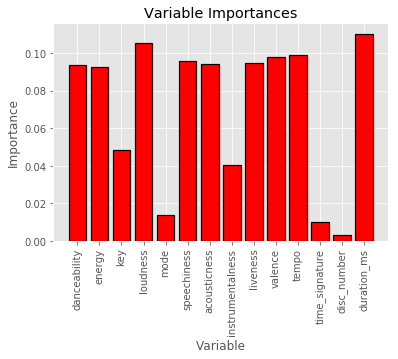

In [12]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

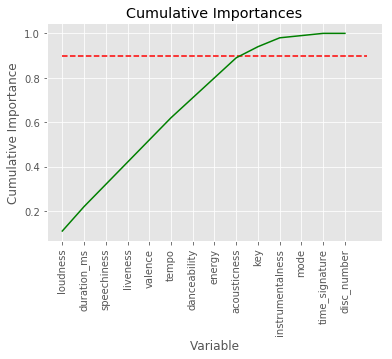

In [13]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

We set an arbritrary threshold of 90% importance. Any additional feature that adds past this threshold is uncessary and will be considered an unimportant feature

#### Refit RandomForrest Model with important features

In [14]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:9]]

# Create training and testing sets with only the important features
important_X = X[important_feature_names] # this removes unimportant features
y = y # y remains the same

# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_predict))
x = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(x)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
Predicted     0    1
Actual              
0          8780   17
1           686  449


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8797
           1       0.96      0.40      0.56      1135

   micro avg       0.93      0.93      0.93      9932
   macro avg       0.95      0.70      0.76      9932
weighted avg       0.93      0.93      0.92      9932

=== All AUC Scores ===
[0.62159025 0.65832894 0.57425588 0.6960245  0.66740808 0.588039
 0.57154762 0.73414221 0.63625285 0.63640998]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6383999307400628


In [15]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.9292186870720902


#### AUC of Model with Removed Unimportant Features

In [16]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc_of_important_features = roc_auc
roc_auc_of_important_features

0.6968311183377994

Perhaps we can further fine-tune our model to achieve a better score through hyperparameter tuning.

# Hyperparameter Tuning To Further Improve Model Performance

Here we will attempt to optimize the settings of the algorithm to see if it can increase the score of our model. Sci-kit has default parameters but this does not guarantee optimal performance. Since it is impossible to determine the optimal paramters ahead of time, tuning is done after everything else is done.

The standard procedure for hyperparameter optimization accounts for overfitting through cross validation. We want to avoid overfitting -- when our model scores well on training data but does not score well on test data.

#### What is Cross- Validation?

There are many methods to implement cross-validation. A common method used is K-fold cross validation. After splitting the data into training and test data, we can further split the data into K-folds. The model then is fit K times, where K-1 of the folds serves as the training data and the remaining folds serves as the test data. We then compute some value metric, such as AUC for binary classifcation, for each iteration of model training. Then we take the average of the value metric for each iteration.

#### Random Search Cross Validation in Scikit-Learn

Scikit-Learn’s `RandomizedSearchCV` allows us to specify a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [17]:
# Look at parameters used by our current forest clasifier
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Random Hyperparameter Grid

Here we will create a parameter grid in order to use `RandomSearchCV`

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators= [10,20,25,30]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [5,10,15,20]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 25, 30]}


In each iteration, a random combination of these parameters will be selected, not all ocmbination will be tested but rather only a random sample of a wide range of values.

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation: i.e. "20 percent is used for testing"
# search across 25 different combinations, and use all available cores

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   27.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

**Performance vs. Time Trade-off**
Increasing the number of iterations increases the number of combinations to try. By increasing the iterations and number of folds we can reduce the chances of overfitting, but the runtime will increase. Perhaps if time permits, we can increase these parameters to imrpove model perfomance?

In [20]:
rfc_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

Here we see the best parameters.

Now that we identified the best parameters, we can see if it improves the score of our model.

#### HyperParameter Tuned Model

In [21]:
# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                             max_depth = None, bootstrap = False)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

#### Final Model Evaluation

In [22]:
# cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring="roc_auc")

print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_predict))
x = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(x)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
Predicted     0    1
Actual              
0          8771   26
1           610  525


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8797
           1       0.95      0.46      0.62      1135

   micro avg       0.94      0.94      0.94      9932
   macro avg       0.94      0.73      0.79      9932
weighted avg       0.94      0.94      0.93      9932

=== All AUC Scores ===
[0.65300626 0.66336099 0.61140695 0.66388226 0.65568588]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6494684676472524


In [23]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
final_roc_auc= auc(false_positive_rate, true_positive_rate)
final_roc_auc

0.7297997565249267

After tuning our hyperparameters we achieve an improved score of 73.6%. Although this is not an excellent score, it is fair and an improvement from our base model.

#### Comparison of Scores of Each Model
1) Model 1 - Base Model <br>
2) Model 2 - Base Model + Extracting Important Features (Features)<br>
3) Model 3 - Base Model + Extracting Important Features + Hyperparameter tuning (Best) <br>

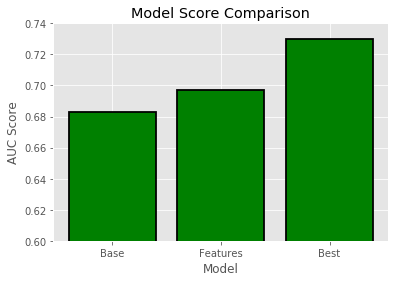

In [29]:
x = ['Base','Features','Best']
y = [base_roc_auc,roc_auc_of_important_features,final_roc_auc]

plt.bar(x, y, color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(x)
plt.ylim(ymin = 0.60, ymax = .74)
plt.xlabel('Model'); plt.ylabel('AUC Score'); plt.title('Model Score Comparison');
plt.show();

In [56]:
print("Base Model")
print("Score", base_roc_auc)
print("\n")
print("Base Model With Important Features")
print(roc_auc_of_important_features)
print("Increase from base model of", "{:10.4f}".format((roc_auc_of_important_features-base_roc_auc))
print("\n")
print("Base Model With Important features and hyperparameter tuning")
print("Score", final_roc_auc)
print("Increase from base model of", "{:10.4f}".format((final_roc_auc-base_roc_auc)))

Base Model
Score 0.6828483278490515


Base Model With Important Features
0.6968311183377994
Increase from base model of     1.3983 %


Base Model With Important features and hyperparameter tuning
Score 0.7297997565249267
Increase from base model of     4.6951 %


#### Conclusion
Initially, we evaluated our model based on its accuracy. However, as we have mentioned before our data is bias in the sense that there are way more non-hit songs than there are hit songs. Therefore, if one wanted to simply create a model with high predictive accuracy then they could simply classify most, if not all, songs as not hit and they would obtain a high accuracy. Thus, it would be better to evaluate our model not on the prediction accuracy but rather on its AUC score.<br>

The base model application of our random forrest obtained a **0.68** AUC score, which is borderline poor. By improving our model with the selection of important features we are able to increase the score by **0.0139** to obtain a score of **0.696**, which is certainly better but still poor. Upon hyper parameter tuning, we increase the score of our model by **0.0469** to get a final score of **0.7297**, which is now considered to be a fair score.

#### Sources

**Implementing Random Forrest**
* https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d
* https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd
* https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

**what is a good AUC?**
* http://gim.unmc.edu/dxtests/roc3.htm
* https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

**measuring model**
* AUC vs standard accuracy
* https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy

**Hyperparameter Tuning**
* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d